Source : 

gits https://gist.github.com/Juanlu001/10305c7730a5b17f6148
original post https://jasmcole.com/2014/08/25/helmhurts/


Other cool stuff:
https://fenicsproject.org/qa/6386/helmholtz-equation-with-absorbent-subdomain

In [91]:
%matplotlib notebook

In [92]:
from fenics import *

First, we will solve this on the unit square. Let's build a mesh.

In [93]:
nx = ny = 30
mesh = RectangleMesh(Point(-1, -1), Point(1, 1), nx, ny)

Let's define the function space upon which we will build.

In [94]:
V = FunctionSpace(mesh, 'P', 1)

Our field will be $E$ and also, we'll define a test function.

Woah I learned this the hard way:

- the unknown is a trial function
- the v field is a test function

Later, I overwrite E with a function.

In [109]:
u = TrialFunction(V)
v = TestFunction(V)

In [110]:
u

In [111]:
v

Our boundary conditions will be null values on the boundary.

In [112]:
def boundary(x, on_boundary):
    "Function to call for boundary conditions."
    return on_boundary

In [124]:
u_D = Expression('0.', degree=2)

We can now define a Dirichlet boundary condition that gets applied to the function space V, and evaluates u_D when on the boundary.

In [125]:
bc = DirichletBC(V, u_D, boundary)

Let's now define the terms used in the equation: the speed of light.

In [166]:
one_over_c_squared = Constant(100.)

Finally, let's write the problem:

In [167]:
a = Constant(-1) * dot(grad(u), grad(v))*dx + one_over_c_squared*u*v*dx
L = v*dx

Applying a point source:
https://fenicsproject.org/qa/2893/point-source-in-rhs-of-heat-eq

In [168]:
A, b = assemble_system(a, L, bc)

And the point source.

In [169]:
source = Point(0.0, 0.0)

In [170]:
delta = PointSource(V, source, 1)
delta.apply(b)

In [171]:
E = Function(V)
solve(A, E.vector(), b)

1

In [172]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


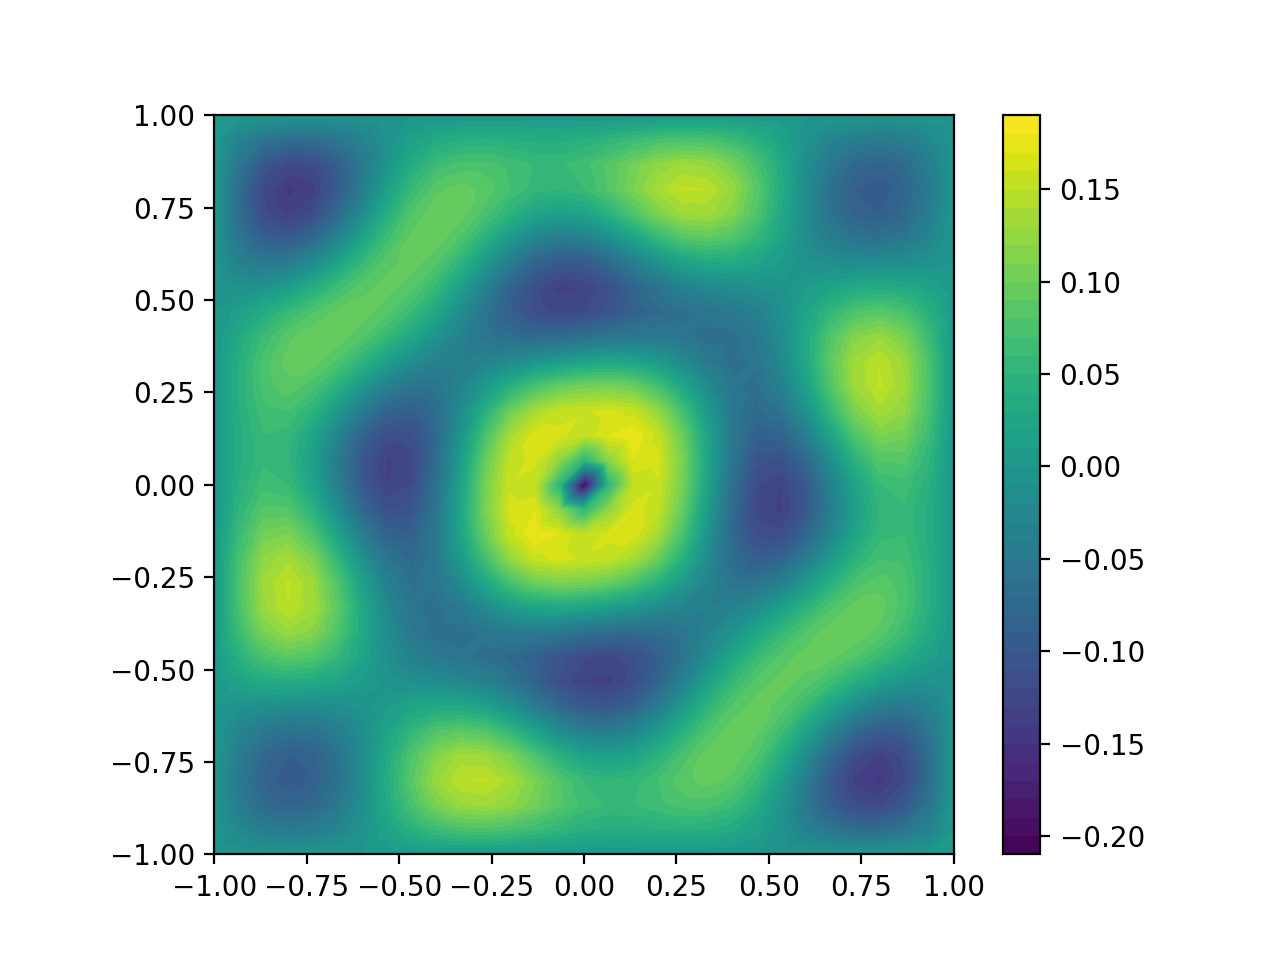

In [173]:
plt.figure()
cnt = plot(E, scalarbar=True)
plt.colorbar(cnt)

Now for some variational stuff:

In [174]:
from ipywidgets import interact

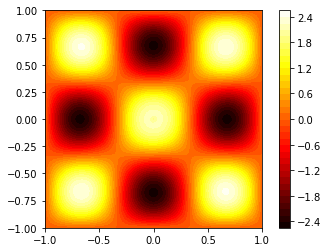

In [218]:
@interact
def plot_helmholtz_solution(one_over_c_squared=(1, 1000)):
    "An interactive plot of the Helmholtz solution."
    nx = ny = 100
    mesh = RectangleMesh(Point(-1, -1), Point(1, 1), nx, ny)
    V = FunctionSpace(mesh, 'P', 1)
    u = TrialFunction(V)
    v = TestFunction(V)
    u_D = Expression('0.', degree=2)
    def boundary(x, on_boundary):
        "Function to call for boundary conditions."
        return on_boundary
    bc = DirichletBC(V, u_D, boundary)
    one_over_c_squared = Constant(one_over_c_squared)
    a = Constant(-1) * dot(grad(u), grad(v))*dx + one_over_c_squared*u*v*dx
    L = v*dx
    A, b = assemble_system(a, L, bc)
    source = Point(0.0, 0.0)
    delta = PointSource(V, source, 1)
    delta.apply(b)
    E = Function(V)
    solve(A, E.vector(), b)
    plt.figure()
    cnt = plot(E, scalarbar=True, cmap='hot')
    plt.colorbar(cnt)

Let's animate this shit.

In [178]:
import moviepy.editor

Let's define a grid on which we interpolate the solution:

In [182]:
import numpy as np

In [183]:
x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
X, Y = np.meshgrid(x, y)

In [185]:
vals = np.zeros_like(X)
for i in range(x.size):
    for j in range(y.size):
        vals[i, j] = E((X[i, j], Y[i, j]))

<IPython.core.display.Javascript object>


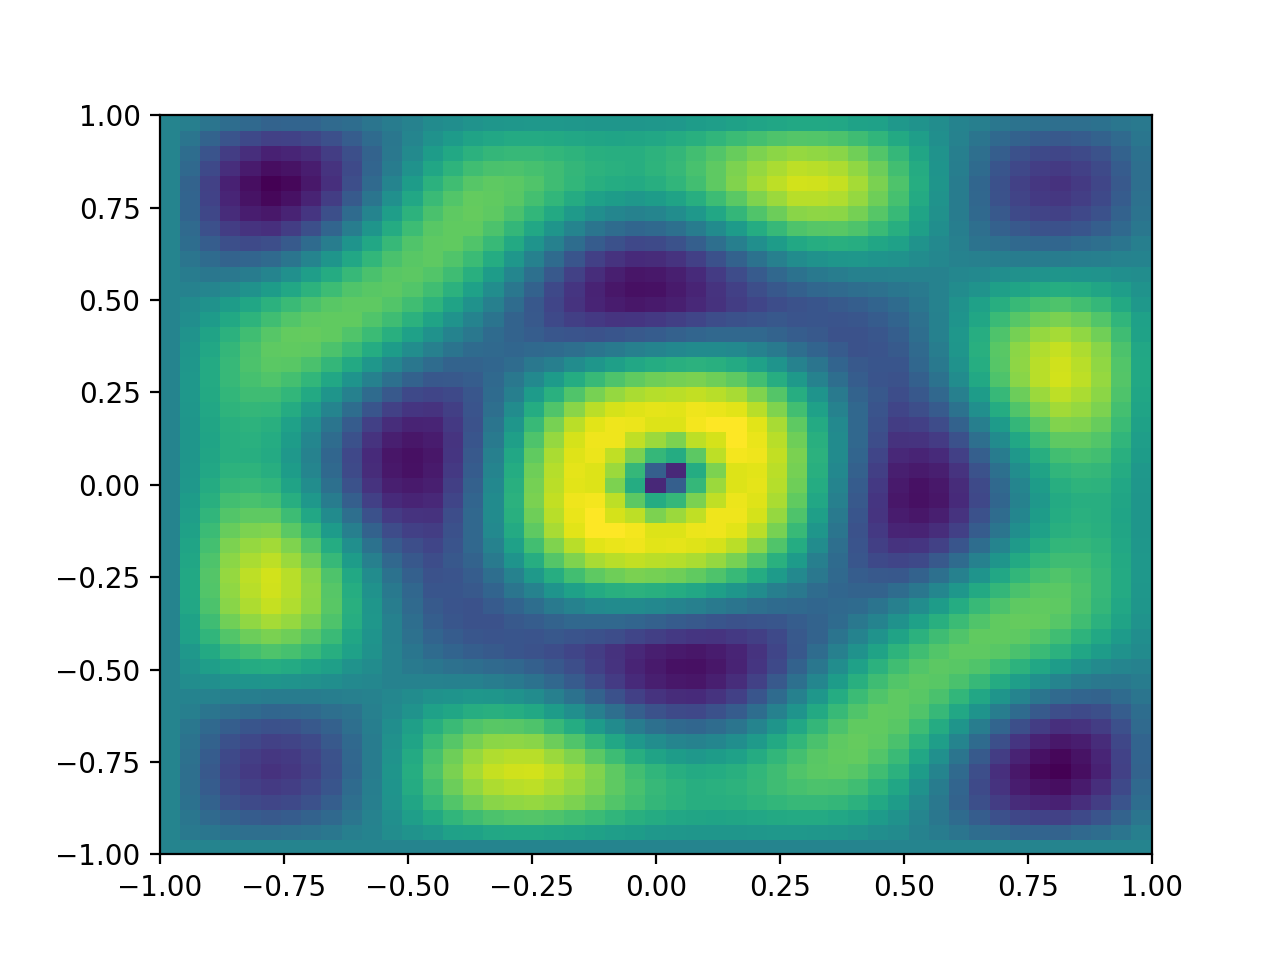

In [186]:
plt.figure()
plt.pcolormesh(x, y, vals)

In [191]:
%matplotlib inline

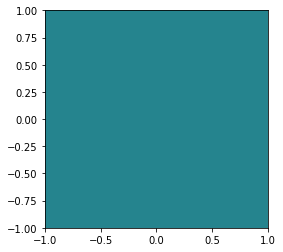

In [213]:
from moviepy.video.io.bindings import mplfig_to_npimage

fig, ax = plt.subplots(1, figsize=(4, 4), facecolor=(1,1,1))
duration = 2.
def make_frame(t):
    ax.clear()
    ax.pcolormesh(x, y, vals * np.sin(2 * np.pi * t / duration), vmin=vals.min(), vmax=vals.max())
    return mplfig_to_npimage(fig)
animation = moviepy.editor.VideoClip(make_frame, duration=duration)

In [216]:
moviepy.editor.ipython_display(animation, fps=10)

 95%|█████████▌| 20/21 [00:01<00:00, 12.22it/s]


In [215]:
animation.write_gif('test2.gif', fps=20)


[MoviePy] Building file test2.gif with imageio


 98%|█████████▊| 40/41 [00:04<00:00,  8.94it/s]


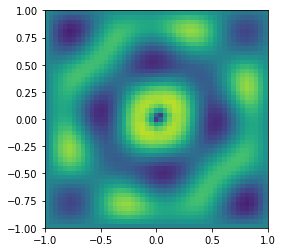

In [212]:
t=0.3
fig, ax = plt.subplots(1, figsize=(4, 4), facecolor=(1,1,1))
duration = 2.
ax.clear()
ax.pcolormesh(x, y, vals * np.sin(2 * np.pi * t / duration), vmin=vals.min(), vmax=vals.max())

In [ ]:
vmin=vals.min()